<a href="https://colab.research.google.com/github/shahdabuhassanien/predicting-fuel-consumption-deep-learning/blob/main/Regression_Models_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Deep Learning Tools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.metrics import MeanAbsoluteError,RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
# preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import set_config
set_config(transform_output='pandas')

import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [2]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [3]:
fpath="https://docs.google.com/spreadsheets/d/e/2PACX-1vTg36jLawSOgGP9hp0oJ3OYZiHMWbuGLiau-8DMjtcKNv7v9Zy_zFBQs9gZU-44GGeIyfXE2iwo26_z/pub?output=csv"
df=pd.read_csv(fpath)
df=df.drop(columns="car name")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# check missing values and duplicates
print('missing values', df.info())
print('\nduplicated rows', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB
missing values None

duplicated rows 0


In [5]:
# now we are gonne split the data
y=df["mpg"]
x=df.drop(columns="mpg")
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [6]:
cat_cols = ['cylinders','model year','origin']
num_cols = x_train.columns.drop(cat_cols)
# num preprocessing
scaler=StandardScaler()
num_tuple=("numeric",scaler,num_cols)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_tuple=("Categorical",encoder,cat_cols)

preprocessor=ColumnTransformer([num_tuple,cat_tuple],verbose_feature_names_out=False)
x_train_tf=preprocessor.fit_transform(x_train)
x_test_tf=preprocessor.transform(x_test)


This Code bekow we Can use it to Have a quick EDA for Data

In [7]:
# !pip install ydata-profiling

In [8]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="EDA Report", explorative=True)
# profile.to_file("eda_report.html")

In [9]:
# from google.colab import files
# files.download("eda_report.html")

Build and Train the Model

In [10]:
# first we are gonna define the shape
input_shape=x_train_tf.shape[1]
input_shape

25

In [11]:
# we are gonna Creat a function to creaat
def build_model():
  model=Sequential()
  model.add(Dense(10,input_dim=input_shape,activation="relu"))
  model.add(Dense(10,activation = 'relu'))
  model.add(Dropout(.2))
  model.add(Dense(1, activation = 'linear'))

  # here we are gonna compile the model
  model.compile (loss="mse",optimizer = 'adam',metrics=[MeanAbsoluteError(),RootMeanSquaredError()])
  return model

In [12]:
reg_model = build_model()

reg_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381 (1.49 KB)

 Trainable params: 381 (1.49 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=3,verbose=1)


In [14]:
history=reg_model.fit(x_train_tf,y_train,validation_split=0.2,  epochs=100, verbose=0, callbacks = [early_stop])

Epoch 74: early stopping


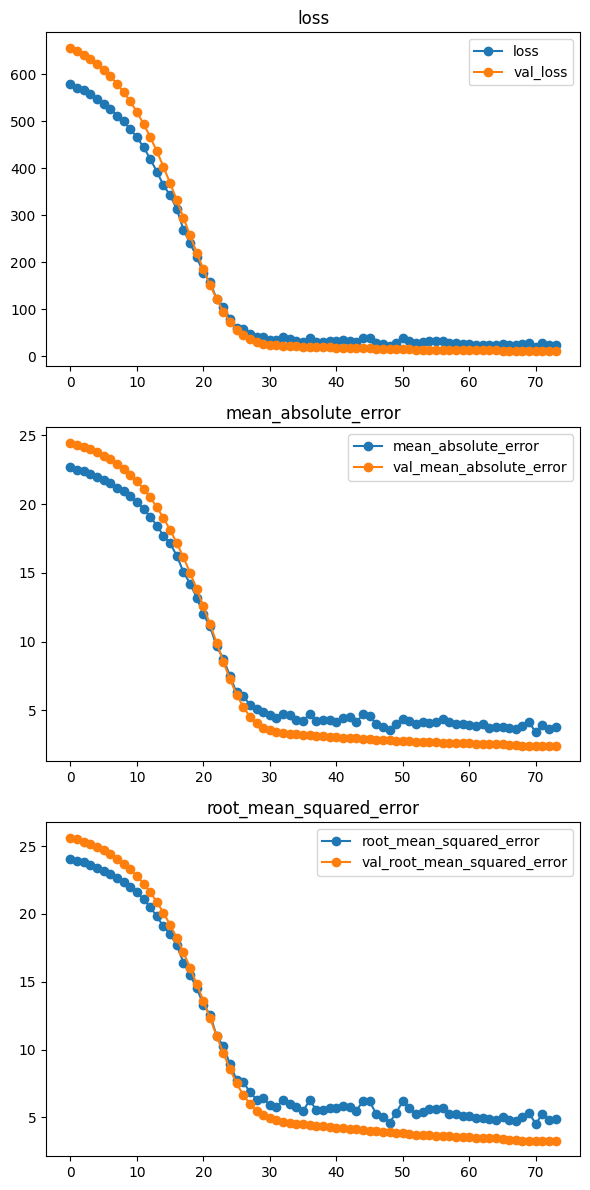

In [15]:
plot_history(history);

###Loss Curve During Training:  

This plot shows the training and validation loss across epochs. Both losses decrease consistently, indicating that the model is learning well and generalizing properly to unseen data. The closeness between the training and validation loss curves suggests that the model is not overfitting, and the training process is stable

In [16]:
reg_model.evaluate(x_test_tf, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.6157 - mean_absolute_error: 2.2249 - root_mean_squared_error: 2.9345


[8.591300964355469, 2.2437636852264404, 2.9310920238494873]

In [17]:
y_pred = reg_model.predict(x_test_tf)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MSE: {mean_squared_error(y_test, y_pred)}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
final RMSE: 2.9310919595533282
final MSE: 8.59130007535817
final MAE: 2.2437634837870695
final R2: 0.8296496152440542


###Interpretation for Stakeholders:
Our final model explains approximately 82.9% of the variation in product sales on unseen data.
This means that our model is able to capture most of the important trends in the data, making it a reliable tool for forecasting.